In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 00. Oversampling & Modeling
- 전처리를 완료한 데이터를 통한 오버샘플링 및 모델링 수행
- 다양한 오버샘플링 기법과 머신러닝 분류 모델들 활용 후 성능 비교
- 언더샘플링도 포함해서 비교 자료로 활용

# 01. Data Load

In [2]:
df = pd.read_csv('./data1_scale.csv')
df.shape

(8014178, 8)

In [3]:
df.head()

,credit_score,desired_amount,existing_loan_amt,loan_limit,loan_rate,is_applied,age,mean_exloan
0,0.633333,0.509254,0.010117,0.0003,0.702703,0.0,0.342857,0.013018
1,0.633333,0.509254,0.010117,0.0001,0.994595,0.0,0.342857,0.013018
2,0.488889,0.428437,0.008520,0.0030,0.886486,1.0,0.385714,0.016444
3,0.677778,0.405797,0.003727,0.0009,0.427027,0.0,0.042857,0.007194
4,0.677778,0.405797,0.003727,0.0010,0.664865,0.0,0.042857,0.007194


In [4]:
from sklearn.model_selection import train_test_split

# train/test split
feature = df.drop(columns='is_applied')
target = df['is_applied']
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.2, random_state=2, stratify=target)

In [67]:
X_test.to_csv("./X_test.csv",index=False)
y_test.to_csv("./y_test.csv",index=False)

# 02. OverSampling

In [4]:
# train/test data load
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

## 02-1.  SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [6]:
y_train.value_counts()

0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

In [7]:
print('smote 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('smote 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_smote.shape, y_train_smote.shape)


print('\n smote 적용 전 레이블 값 분포: \n', y_train.value_counts())
print('\n smote 적용 후 레이블 값 분포: \n', y_train_smote.value_counts())

smote 적용 전 학습용 피처/레이블 데이터 세트:  (6411342, 7) (6411342,)
smote 적용 후 학습용 피처/레이블 데이터 세트:  (12129542, 7) (12129542,)

 smote 적용 전 레이블 값 분포: 
 0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

 smote 적용 후 레이블 값 분포: 
 0.0    6064771
1.0    6064771
Name: is_applied, dtype: int64


In [61]:
X_train_smote.to_csv('./X_train_smote', index=False)
y_train_smote.to_csv('./y_train_smote', index=False)

## 02-2. BorderlineSMOTE

In [9]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_border, y_train_border = bsmote.fit_resample(X_train, y_train)

In [10]:
print('borderline smote 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('borderline smote 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_border.shape, y_train_border.shape)


print('\n borderline smote 적용 전 레이블 값 분포: \n', y_train.value_counts())
print('\n borderline smote 적용 후 레이블 값 분포: \n', y_train_border.value_counts())

borderline smote 적용 전 학습용 피처/레이블 데이터 세트:  (6411342, 7) (6411342,)
borderline smote 적용 후 학습용 피처/레이블 데이터 세트:  (12129542, 7) (12129542,)

 borderline smote 적용 전 레이블 값 분포: 
 0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

 borderline smote 적용 후 레이블 값 분포: 
 0.0    6064771
1.0    6064771
Name: is_applied, dtype: int64


In [62]:
X_train_border.to_csv("X_train_border.csv",index=False)
y_train_border.to_csv("y_train_border.csv",index=False)

## 02-3. ADASYN

In [11]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=22)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [12]:
print('adasyn 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('adasyn 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_adasyn.shape, y_train_adasyn.shape)


print('\n adasyn 적용 전 레이블 값 분포: \n', y_train.value_counts())
print('\n adasyn 적용 후 레이블 값 분포: \n', y_train_adasyn.value_counts())

adasyn 적용 전 학습용 피처/레이블 데이터 세트:  (6411342, 7) (6411342,)
adasyn 적용 후 학습용 피처/레이블 데이터 세트:  (12171359, 7) (12171359,)

 adasyn 적용 전 레이블 값 분포: 
 0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

 adasyn 적용 후 레이블 값 분포: 
 1.0    6106588
0.0    6064771
Name: is_applied, dtype: int64


In [63]:
X_train_adasyn.to_csv("X_train_adasyn.csv",index=False)
y_train_adasyn.to_csv("y_train_adasyn.csv",index=False)

## 02-4. SMOTETOMEK

In [13]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_tomek, y_train_tomek = smoteto.fit_resample(X_train, y_train)

In [14]:
print('smotetomek 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('smotetomek 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_tomek.shape, y_train_tomek.shape)


print('\n smotetomek 적용 전 레이블 값 분포: \n', y_train.value_counts())
print('\n smotetomek 적용 후 레이블 값 분포: \n', y_train_tomek.value_counts())

smotetomek 적용 전 학습용 피처/레이블 데이터 세트:  (6411342, 7) (6411342,)
smotetomek 적용 후 학습용 피처/레이블 데이터 세트:  (12102636, 7) (12102636,)

 smotetomek 적용 전 레이블 값 분포: 
 0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

 smotetomek 적용 후 레이블 값 분포: 
 1.0    6064771
0.0    6037865
Name: is_applied, dtype: int64


In [65]:
X_train_tomek.to_csv("X_train_tomek.csv",index=False)
y_train_tomek.to_csv("y_train_tomek.csv",index=False)

## 02-5. SMOTEENN

In [15]:
from imblearn.combine import SMOTEENN 

X_train_enn, y_train_enn = SMOTEENN(random_state=0).fit_resample(X_train, y_train)

In [16]:
print('smoteenn 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('smoteenn 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_enn.shape, y_train_enn.shape)


print('\n smotetomek 적용 전 레이블 값 분포: \n', y_train.value_counts())
print('\n smotetomek 적용 후 레이블 값 분포: \n', y_train_enn.value_counts())

smoteenn 적용 전 학습용 피처/레이블 데이터 세트:  (6411342, 7) (6411342,)
smoteenn 적용 후 학습용 피처/레이블 데이터 세트:  (10487630, 7) (10487630,)

 smotetomek 적용 전 레이블 값 분포: 
 0.0    6064771
1.0     346571
Name: is_applied, dtype: int64

 smotetomek 적용 후 레이블 값 분포: 
 1.0    5404062
0.0    5083568
Name: is_applied, dtype: int64


In [66]:
X_train_enn.to_csv("X_train_enn.csv",index=False)
y_train_enn.to_csv("y_train_enn.csv",index=False)

# 03. Modeling
- LogisticRegression, XGBoostClassifier

In [ ]:
# train 데이터 로드
X_train_smote = pd.read_csv('data/X_train_smote.csv')
X_train_border = pd.read_csv('data/X_train_border.csv')
X_train_adasyn = pd.read_csv('data/X_train_adasyn.csv')
X_train_tomek = pd.read_csv('data/X_train_tomek.csv')
X_train_enn = pd.read_csv('data/X_train_enn.csv')

y_train_smote = pd.read_csv('data/y_train_smote.csv')
y_train_border = pd.read_csv('data/y_train_border.csv')
y_train_adasyn = pd.read_csv('data/y_train_adasyn.csv')
y_train_tomek = pd.read_csv('data/y_train_tomek.csv')
y_train_enn = pd.read_csv('data/y_train_enn.csv')

## 03-1. SMOTE + LogisticRegression

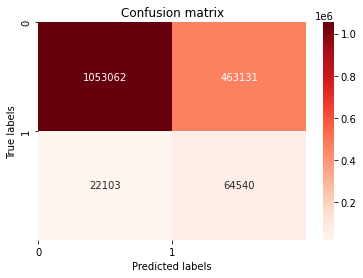


 0.6972653471721374

 0.21012055723945736

               precision    recall  f1-score   support

     Class 0       0.98      0.69      0.81   1516193
     Class 1       0.12      0.74      0.21     86643

    accuracy                           0.70   1602836
   macro avg       0.55      0.72      0.51   1602836
weighted avg       0.93      0.70      0.78   1602836



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-2. Border + LogisticRegression

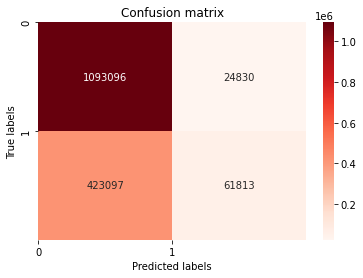


 0.7205409661375213

 0.21629840102317718

               precision    recall  f1-score   support

     Class 0       0.98      0.72      0.83   1516193
     Class 1       0.13      0.71      0.22     86643

    accuracy                           0.72   1602836
   macro avg       0.55      0.72      0.52   1602836
weighted avg       0.93      0.72      0.80   1602836



In [20]:
model = LogisticRegression()
model.fit(X_train_border, y_train_border)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_pred, y_test))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-3. ADASYN + LogisticRegression

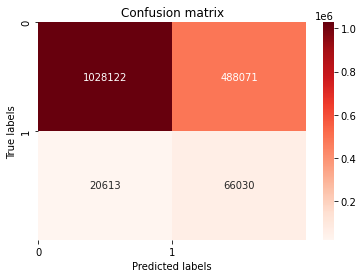


 0.6826350294103701

 0.2061041539210668

               precision    recall  f1-score   support

     Class 0       0.98      0.68      0.80   1516193
     Class 1       0.12      0.76      0.21     86643

    accuracy                           0.68   1602836
   macro avg       0.55      0.72      0.50   1602836
weighted avg       0.93      0.68      0.77   1602836



In [21]:
model = LogisticRegression()
model.fit(X_train_adasyn, y_train_adasyn)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-4. TOMEK + LogisticRegression

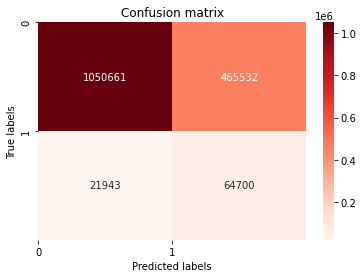


 0.6958672003873135

 0.20976697061803443

               precision    recall  f1-score   support

     Class 0       0.98      0.69      0.81   1516193
     Class 1       0.12      0.75      0.21     86643

    accuracy                           0.70   1602836
   macro avg       0.55      0.72      0.51   1602836
weighted avg       0.93      0.70      0.78   1602836



In [22]:
model = LogisticRegression()
model.fit(X_train_tomek, y_train_tomek)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-5. ENN + LogisticRegression

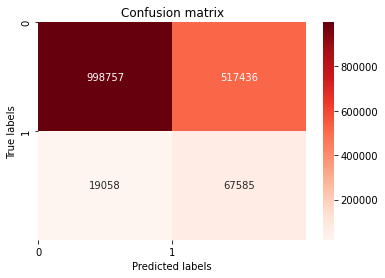


 0.665284533164965

 0.20124645656161413

               precision    recall  f1-score   support

     Class 0       0.98      0.66      0.79   1516193
     Class 1       0.12      0.78      0.20     86643

    accuracy                           0.67   1602836
   macro avg       0.55      0.72      0.49   1602836
weighted avg       0.93      0.67      0.76   1602836



In [23]:
model = LogisticRegression()
model.fit(X_train_enn, y_train_enn)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-6. SMOTE + XGBoost

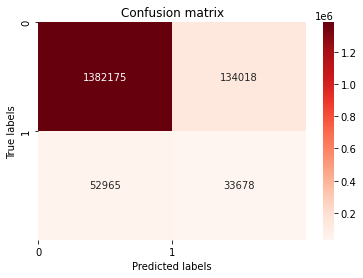


 0.8833424005949455

 0.2648276512843095

               precision    recall  f1-score   support

     Class 0       0.96      0.91      0.94   1516193
     Class 1       0.20      0.39      0.26     86643

    accuracy                           0.88   1602836
   macro avg       0.58      0.65      0.60   1602836
weighted avg       0.92      0.88      0.90   1602836



In [35]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model = model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
plot_importance(xgb_model, ax=ax)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-7 Border + XGBoost

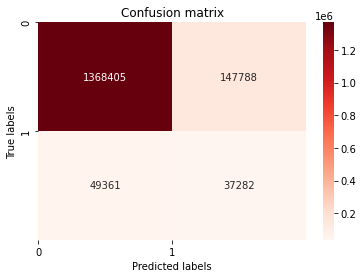


 0.8769998926902066

 0.2744219084107128

               precision    recall  f1-score   support

     Class 0       0.97      0.90      0.93   1516193
     Class 1       0.20      0.43      0.27     86643

    accuracy                           0.88   1602836
   macro avg       0.58      0.67      0.60   1602836
weighted avg       0.92      0.88      0.90   1602836



In [36]:
model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model = model.fit(X_train_border, y_train_border)

y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
plot_importance(xgb_model, ax=ax)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-8. ADASYN + XGBoost

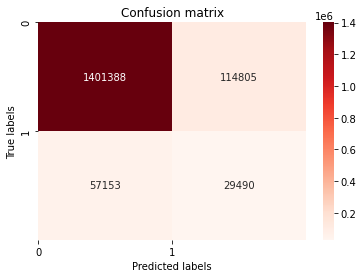


 0.8927164101629861

 0.2553932224233344

               precision    recall  f1-score   support

     Class 0       0.96      0.92      0.94   1516193
     Class 1       0.20      0.34      0.26     86643

    accuracy                           0.89   1602836
   macro avg       0.58      0.63      0.60   1602836
weighted avg       0.92      0.89      0.91   1602836



In [37]:
model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model = model.fit(X_train_adasyn, y_train_adasyn)

y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
plot_importance(xgb_model, ax=ax)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-9. TOMEK + XGBoost

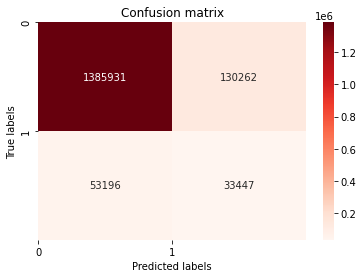


 0.8855416274653177

 0.26719978270595

               precision    recall  f1-score   support

     Class 0       0.96      0.91      0.94   1516193
     Class 1       0.20      0.39      0.27     86643

    accuracy                           0.89   1602836
   macro avg       0.58      0.65      0.60   1602836
weighted avg       0.92      0.89      0.90   1602836



In [38]:
model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model = model.fit(X_train_tomek, y_train_tomek)

y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
plot_importance(xgb_model, ax=ax)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-10. ENN + XGBoost

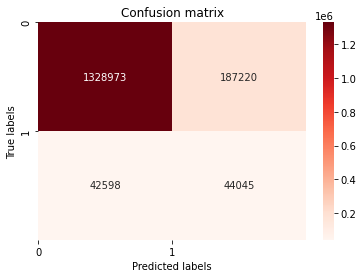


 0.8566178947814997

 0.27709274381267535

               precision    recall  f1-score   support

     Class 0       0.97      0.88      0.92   1516193
     Class 1       0.19      0.51      0.28     86643

    accuracy                           0.86   1602836
   macro avg       0.58      0.69      0.60   1602836
weighted avg       0.93      0.86      0.89   1602836



In [39]:
model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model = model.fit(X_train_enn, y_train_enn)

y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
plot_importance(xgb_model, ax=ax)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-11. SMOTE + LightGBM

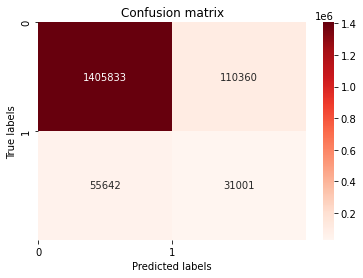


 0.8964323237062307

 0.27193382572235575

               precision    recall  f1-score   support

     Class 0       0.96      0.93      0.94   1516193
     Class 1       0.22      0.36      0.27     86643

    accuracy                           0.90   1602836
   macro avg       0.59      0.64      0.61   1602836
weighted avg       0.92      0.90      0.91   1602836



In [46]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', random_state=5)
lgbm_model = model.fit(X_train_smote, y_train_smote)

y_pred = lgbm_model.predict(X_test)
y_pred_probs = lgbm_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-12. Border + LightGBM

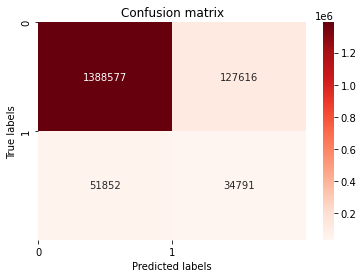


 0.8880309651143349

 0.27938968078699056

               precision    recall  f1-score   support

     Class 0       0.96      0.92      0.94   1516193
     Class 1       0.21      0.40      0.28     86643

    accuracy                           0.89   1602836
   macro avg       0.59      0.66      0.61   1602836
weighted avg       0.92      0.89      0.90   1602836



In [47]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', random_state=5)
lgbm_model = model.fit(X_train_border, y_train_border)

y_pred = lgbm_model.predict(X_test)
y_pred_probs = lgbm_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-13. ADASYN + LightGBM

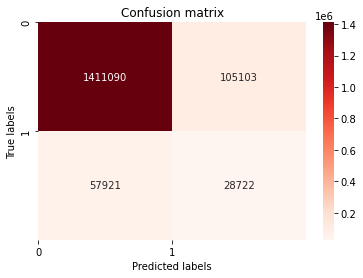


 0.898290280477853

 0.26055481974708344

               precision    recall  f1-score   support

     Class 0       0.96      0.93      0.95   1516193
     Class 1       0.21      0.33      0.26     86643

    accuracy                           0.90   1602836
   macro avg       0.59      0.63      0.60   1602836
weighted avg       0.92      0.90      0.91   1602836



In [48]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', random_state=5)
lgbm_model = model.fit(X_train_adasyn, y_train_adasyn)

y_pred = lgbm_model.predict(X_test)
y_pred_probs = lgbm_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-14. TOMEK + LightGBM

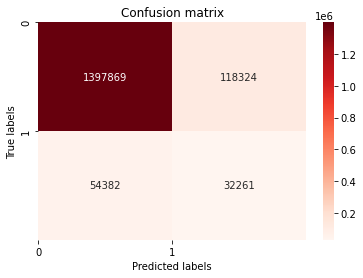


 0.8922497373405639

 0.2719830711383142

               precision    recall  f1-score   support

     Class 0       0.96      0.92      0.94   1516193
     Class 1       0.21      0.37      0.27     86643

    accuracy                           0.89   1602836
   macro avg       0.59      0.65      0.61   1602836
weighted avg       0.92      0.89      0.91   1602836



In [49]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', random_state=5)
lgbm_model = model.fit(X_train_tomek, y_train_tomek)

y_pred = lgbm_model.predict(X_test)
y_pred_probs = lgbm_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-15. ENN + LightGBM

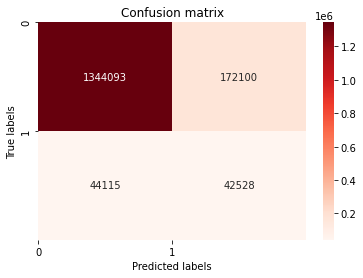


 0.8651047268716201

 0.2823238877953736

               precision    recall  f1-score   support

     Class 0       0.97      0.89      0.93   1516193
     Class 1       0.20      0.49      0.28     86643

    accuracy                           0.87   1602836
   macro avg       0.58      0.69      0.60   1602836
weighted avg       0.93      0.87      0.89   1602836



In [50]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', random_state=5)
lgbm_model = model.fit(X_train_enn, y_train_enn)

y_pred = lgbm_model.predict(X_test)
y_pred_probs = lgbm_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-16. SMOTE + AdaBoost

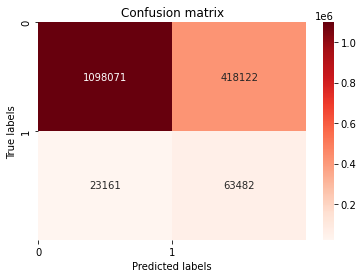


 0.7246861188543307

 0.22343100799476287

               precision    recall  f1-score   support

     Class 0       0.98      0.72      0.83   1516193
     Class 1       0.13      0.73      0.22     86643

    accuracy                           0.72   1602836
   macro avg       0.56      0.73      0.53   1602836
weighted avg       0.93      0.72      0.80   1602836



In [51]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_model = model.fit(X_train_smote, y_train_smote)

y_pred = Ada_model.predict(X_test)
y_pred_probs = Ada_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-17. Border + AdaBoost

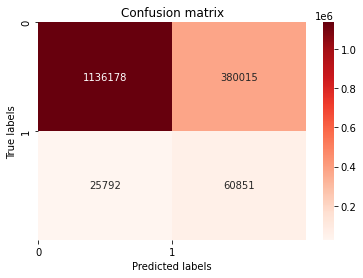


 0.7468193876354162

 0.23071075564587523

               precision    recall  f1-score   support

     Class 0       0.98      0.75      0.85   1516193
     Class 1       0.14      0.70      0.23     86643

    accuracy                           0.75   1602836
   macro avg       0.56      0.73      0.54   1602836
weighted avg       0.93      0.75      0.82   1602836



In [52]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_model = model.fit(X_train_border, y_train_border)

y_pred = Ada_model.predict(X_test)
y_pred_probs = Ada_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-18. ADASYN + AdaBoost

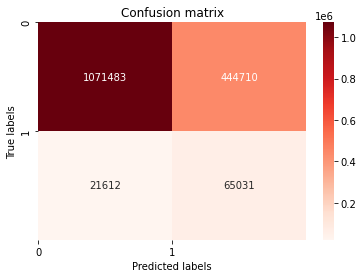


 0.70906443329199

 0.2180843215109728

               precision    recall  f1-score   support

     Class 0       0.98      0.71      0.82   1516193
     Class 1       0.13      0.75      0.22     86643

    accuracy                           0.71   1602836
   macro avg       0.55      0.73      0.52   1602836
weighted avg       0.93      0.71      0.79   1602836



In [53]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_model = model.fit(X_train_adasyn, y_train_adasyn)

y_pred = Ada_model.predict(X_test)
y_pred_probs = Ada_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-19. Tomek + AdaBoost

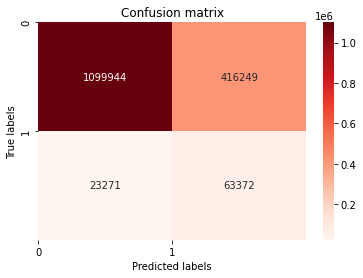


 0.7257860442365907

 0.223824929714762

               precision    recall  f1-score   support

     Class 0       0.98      0.73      0.83   1516193
     Class 1       0.13      0.73      0.22     86643

    accuracy                           0.73   1602836
   macro avg       0.56      0.73      0.53   1602836
weighted avg       0.93      0.73      0.80   1602836



In [54]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_model = model.fit(X_train_tomek, y_train_tomek)

y_pred = Ada_model.predict(X_test)
y_pred_probs = Ada_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 03-20. ENN + AdaBoost

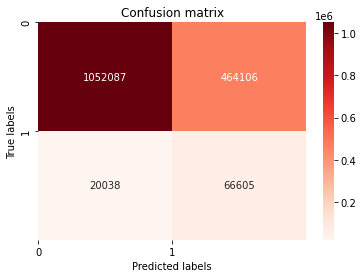


 0.6979453917930468

 0.21577571377200114

               precision    recall  f1-score   support

     Class 0       0.98      0.69      0.81   1516193
     Class 1       0.13      0.77      0.22     86643

    accuracy                           0.70   1602836
   macro avg       0.55      0.73      0.51   1602836
weighted avg       0.94      0.70      0.78   1602836



In [55]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_model = model.fit(X_train_enn, y_train_enn)

y_pred = Ada_model.predict(X_test)
y_pred_probs = Ada_model.predict_proba(X_test)[:,1]

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))